# 5-01 Analysis of the data set

The aim is to determine the maximum number of objects with different identifications within the data set.

The annotations are masks that are used for semantic segmentation. It is the targets that are needed to train a neural network. These masks mark objects in relation to an original image. To differentiate between the objects, each mask object has an object-specific identification number (class number) with consecutive numbering starting with 1. The background itself is given the number 0.

The object classification by means of a neural network (semantic instance segmentation) requires the number of maximum output channels as a parameter. The mask objects provide information about this.

In this project section, the mask images are analyzed in order to determine the maximum number of possible object types.

## Libraries, modules, classes

In [ ]:
import numpy as np
import os
from skimage.io import imread
# JH - Jonas Heinke
from configuration_CRAG import Path   as PATH # Paths and filenames
from MODULE.JH.visualize import Show as SHOW

## Constants

In [ ]:
# for display only
VERBOSE=True

**Text fett markieren**## 1. Generate file names as a list
A path for the images and a path for the associated masks are selected.

In [ ]:
path=PATH() # Instance of the class required for method call
path_images=[path.trainimages, path.testimages]
path_masks= [path.trainmasks, path.testmasks]
dataset=0
# input and target files
image_filenames  = path.get_filenames(path_images[dataset] ,dateifilter= '*.png', sort=True)
mask_filenames = path.get_filenames(path_masks[dataset], dateifilter= '*.png', sort=True)

In [ ]:
print('Number of image-mask pairs:: ',len(image_filenames),' : ', len(mask_filenames))
if VERBOSE:
    for idx in range(len(image_filenames)):
        print(idx, ' | ', os.path.basename(image_filenames[idx]),'\t-> ', os.path.basename(mask_filenames[idx]))

Number of image-mask pairs::  173  :  173
0  |  train_01.png 	->  train_01.png
1  |  train_02.png 	->  train_02.png
2  |  train_03.png 	->  train_03.png
3  |  train_04.png 	->  train_04.png
4  |  train_05.png 	->  train_05.png
5  |  train_06.png 	->  train_06.png
6  |  train_07.png 	->  train_07.png
7  |  train_08.png 	->  train_08.png
8  |  train_09.png 	->  train_09.png
9  |  train_10.png 	->  train_10.png
10  |  train_100.png 	->  train_100.png
11  |  train_101.png 	->  train_101.png
12  |  train_102.png 	->  train_102.png
13  |  train_103.png 	->  train_103.png
14  |  train_104.png 	->  train_104.png
15  |  train_105.png 	->  train_105.png
16  |  train_106.png 	->  train_106.png
17  |  train_107.png 	->  train_107.png
18  |  train_108.png 	->  train_108.png
19  |  train_109.png 	->  train_109.png
20  |  train_11.png 	->  train_11.png
21  |  train_110.png 	->  train_110.png
22  |  train_111.png 	->  train_111.png
23  |  train_112.png 	->  train_112.png
24  |  train_113.png 	->  trai

##  2. Loading the images and the associated masks from the directories

In [ ]:
# read images and store them in memory
images = [imread(img_name) for img_name in image_filenames]
masks = [imread(mask_name) for mask_name in mask_filenames]

In [ ]:
if VERBOSE:    
    print('path_images: ', path_images)
    print('path_masks : ', path_masks)
    print('Anzahl der Bilder: inputs {}, targets {} '.format(len(images), len(masks)))
    print('Shape of origin: inputs {}, targets {} '.format(images[0].shape, masks[0].shape))

path_images:  [PosixPath('../___Datasets/CRAG_v2/train/Images'), PosixPath('../___Datasets/CRAG_v2/valid/Images')]
path_masks :  [PosixPath('../___Datasets/CRAG_v2/train/Annotation'), PosixPath('../___Datasets/CRAG_v2/valid/Annotation')]
Anzahl der Bilder: inputs 173, targets 173 
Shape of origin: inputs (1516, 1508, 3), targets (1516, 1508) 


## 3. Determination of the number of objects in a mask

In [ ]:
max_class_of_all=0
id
max_idx=[]
for i in range(len(masks)):
    max_idx.append(masks[i].max())
if VERBOSE:
    print([f'{max_idx[i]}[{i}]' for i in range(len(max_idx))])

['21[0]', '5[1]', '8[2]', '14[3]', '12[4]', '13[5]', '4[6]', '1[7]', '4[8]', '6[9]', '13[10]', '14[11]', '7[12]', '18[13]', '8[14]', '5[15]', '10[16]', '3[17]', '12[18]', '24[19]', '9[20]', '7[21]', '1[22]', '6[23]', '26[24]', '2[25]', '56[26]', '9[27]', '2[28]', '7[29]', '6[30]', '7[31]', '7[32]', '20[33]', '46[34]', '11[35]', '29[36]', '32[37]', '10[38]', '11[39]', '30[40]', '10[41]', '2[42]', '5[43]', '5[44]', '14[45]', '8[46]', '3[47]', '66[48]', '42[49]', '6[50]', '12[51]', '7[52]', '7[53]', '7[54]', '9[55]', '8[56]', '13[57]', '8[58]', '39[59]', '18[60]', '46[61]', '7[62]', '4[63]', '10[64]', '6[65]', '7[66]', '6[67]', '2[68]', '12[69]', '2[70]', '1[71]', '3[72]', '25[73]', '12[74]', '18[75]', '33[76]', '9[77]', '7[78]', '16[79]', '3[80]', '16[81]', '31[82]', '2[83]', '6[84]', '19[85]', '38[86]', '13[87]', '9[88]', '29[89]', '7[90]', '29[91]', '2[92]', '5[93]', '52[94]', '35[95]', '18[96]', '9[97]', '24[98]', '28[99]', '48[100]', '23[101]', '9[102]', '37[103]', '24[104]', '10[105

In [ ]:
max_idx_all=max(max_idx)
idx_of_max= np.argmax(max_idx)
print('Maximum number of classes or number of object IDs:\n Max= {}[idx={}]: '.
      format(max_idx_all,idx_of_max ))    

Maximum number of classes or number of object IDs:
 Max= 96[idx=165]: 


## 4. Visualization

#### Histograms

In [ ]:
#+ from MODULE.JH.visualize import Show as SHOW
show=SHOW(experiment='', figsize=(60,70), fontsize=16)

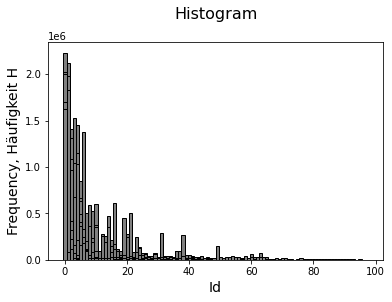

In [ ]:
#histogramms=[]
histogramm=[show.histogramm(mask,f'(5-1)_Sum_histogram__{dataset}',\
                            ordinate='Frequency, Häufigkeit H', relativ=False)\
            for mask in masks]

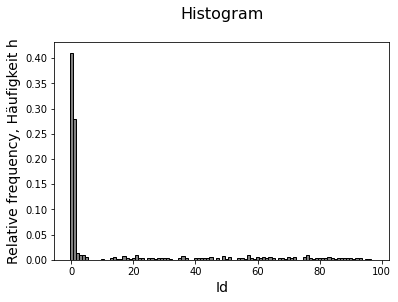

In [ ]:
histogramm=show.histogramm(masks[idx_of_max],f'(5-1)_histogram_{dataset}_({idx_of_max})',\
                            ordinate='Relative frequency, Häufigkeit h', relativ=True)

#### Images and masks

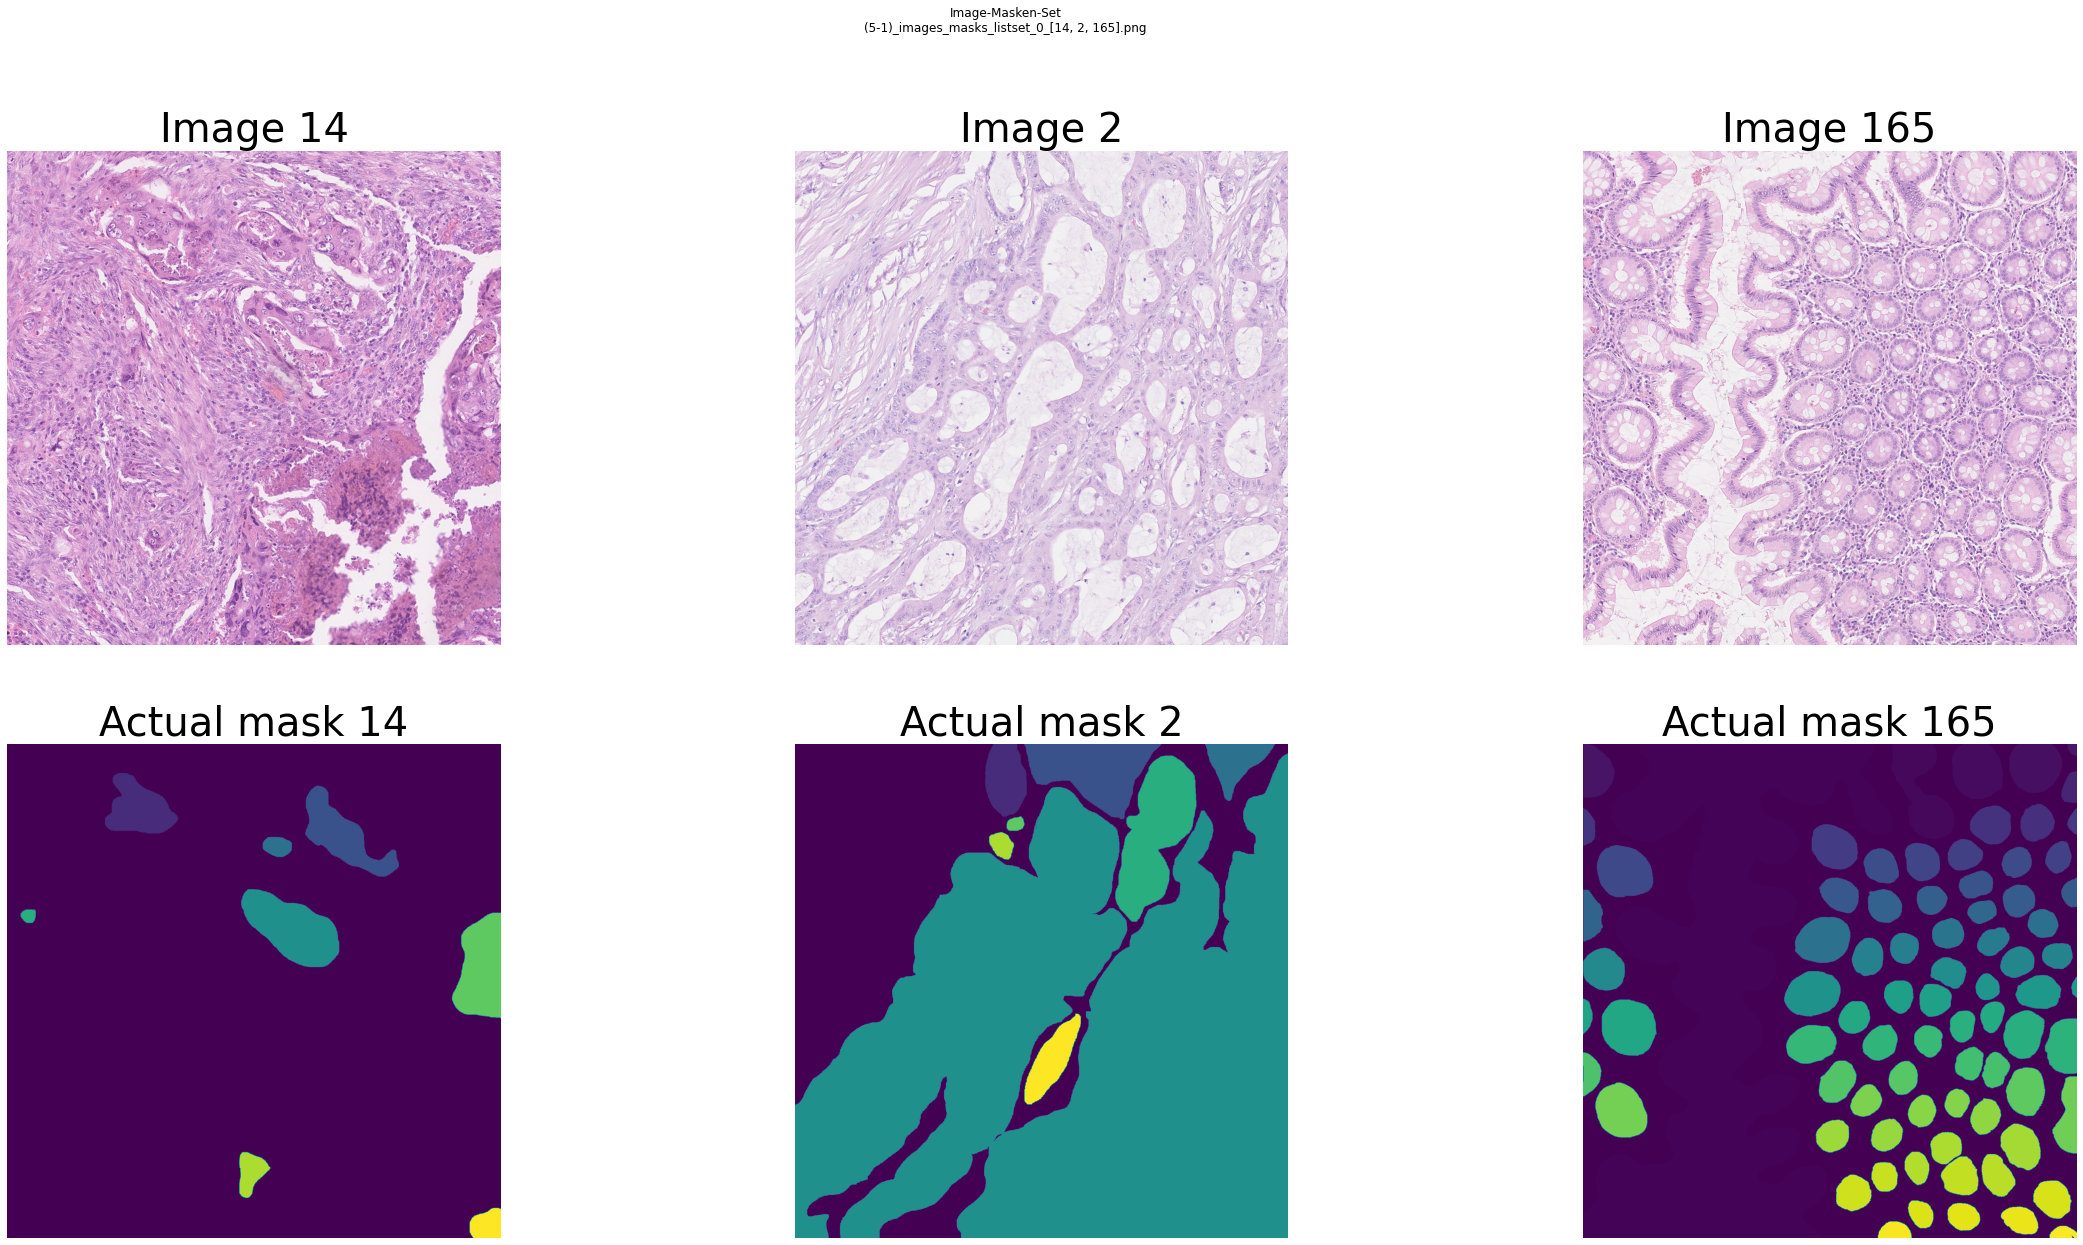

In [ ]:
show=SHOW(experiment='', figsize=(40,20), fontsize=40)
idx_list=[14, 2, 165]
path_set= f'(5-1)_images_masks_listset_{dataset}_{str(idx_list)}.png'
listset=list([images, masks])
titles=list(['Image', 'Actual mask'])
show.list_set(idx_list, listset,titles, path=path_set)

In [ ]:
print('END')

END
